<div style = "text-align: center">
<h4><b>24MA604 - COMPUTATIONAL MATHEMATICS FOR DATA SCIENCE</b></h4>
<h4><b>FIRST SEMESTER 2025 - 2026 | M.TECH DATA SCIENCE</b></h4>
<h4><b>END SEMESTER PROJECT</b></h4>

<h4> NIKHITA AJITH | CB.AI.P2DSC25023 </h4>
</div>
<h4 style = "text-align: center"><b>Image Rescaling Using Singular Value Decomposition (SVD)</b></h4>
<hr>


##  **Introduction**

SVD factorizes an image matrix into three components that separate the geometric structure, frequency information, and intensity variations of the image. Instead of scaling pixel values directly, we scale the matrix components obtained from the SVD factorization:

\[
 A=U* Σ* V^T
\]

Here:
- **U** contains left singular vectors (vertical information)
- **Σ** contains singular values  
- **V** contains right singular vectors (Horizontal information)

By resizing **U** and **V**, we scale the image while preserving structural information.

We compare SVD-based scaling with standard **bicubic interpolation** using
- **PSNR** (Peak Signal-to-Noise Ratio)  
- **SSIM** (Structural Similarity Index)

## **Importing necessary libraries** 

In [2]:
import os #  to read files from the dataset folder
import cv2 # for image processing
import numpy as np # for mathematical operations (SVD computation) 
import matplotlib.pyplot as plt # to display images 
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim 
# to compute PSNR and SSIM

## **Loading the dataset** 

In [3]:
# Load dataset
folder = r"D:\datasets\rescaling image using svd dataset\DIV2K_train_HR\DIV2K_train_HR"

# Getting all image files 
image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png'))] # accepts all jpg and png image files
image_files.sort()  # ensures consistent order

max_images = 5  # use first 40 for testing
dataset_gray = [] # empty list to store the grayscale version of the image 
dataset_color = [] # empty list to store color image

print(f"Number of image files found: {len(image_files)}")

for i, filename in enumerate(image_files[:max_images]): # enumerate() give the index and the name of the image together
    img_path = os.path.join(folder, filename) 
    img_color = cv2.imread(img_path) # load the image into python but this loads the image as BGR form (BLUE GREEN RED)
    img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # convert BGR to RGB for plotting
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY) # converts color image to gray image 

# SVD requires a 2D matrix, Color images are 3D. The SVD mathematically applies to grayscale images

    # Resizing the image because the original image size is 4000×3000 or 3000x2000. This helps in fast computation.
    img_gray = cv2.resize(img_gray, (256, 256))
    img_color = cv2.resize(img_color, (256, 256))

    # converts pixel values to the range [0,1] for SVD, plotting, and PSNR/SSIM
    dataset_gray.append(img_gray / 255.0) # stores each processed image into the dataset 
    dataset_color.append(img_color / 255.0)

print("Dataset loaded successfully.\n")

Number of image files found: 800
Dataset loaded successfully.



## **Performing SVD and reconstruction in images**

In [6]:
# SVD decomposition example
I_gray = dataset_gray[1] # loads first grayscale image from your dataset
U, S, Vt = np.linalg.svd(I_gray, full_matrices=False) # performing SVD
I_reconstructed = np.dot(U, np.dot(np.diag(S), Vt)) 

## **Plotting the images**

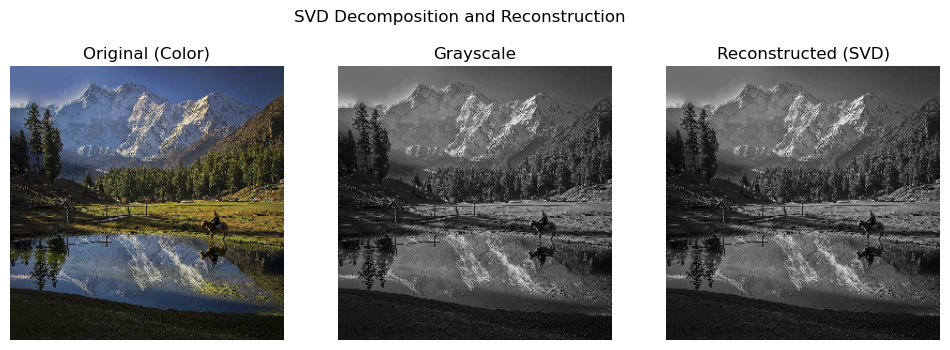

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(dataset_color[1])
plt.title("Original (Color)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(I_gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(I_reconstructed, cmap='gray')
plt.title("Reconstructed (SVD)")
plt.axis("off")
plt.suptitle("SVD Decomposition and Reconstruction")
plt.show()

## **Comparing SVD and Bicubic upscaling**

##### **SVD Upscaling**
-> Here we use matrix decomposition (U, Σ, Vᵀ), this preserves image structure & energy
SVD Upscales components, not pixels, this gives high-quality results.

##### **Bicubic Upscaling**
-> Bicubic upscaling uses pixel interpolation. This upscales using 16 neighboring pixels. Smooth results are obtained but less structural understanding.

In [9]:
# SVD-based upscaling vs Bicubic
scale = 2  # Upscaling factor; this increses the resolution of the image
psnr_svd_all = [] # empty list to store PSNR values
psnr_bicubic_all = [] # empty list to store PSNR of bicubic upscaled images
ssim_svd_all = [] # this stores SSIM values
ssim_bicubic_all = [] # this list stores SSIM values of bicubic interpolation
print("\n--- PSNR and SSIM scores for both SVD and BICUBIC ---")

for i, I in enumerate(dataset_gray):
    # Perform SVD
    U, S, Vt = np.linalg.svd(I, full_matrices=False)

    # Interpolate U and V (bicubic)
    # U.shape[0] = rows(height) U.shape[1] = columns(width) 
    U_scaled = cv2.resize(U, (U.shape[1], int(U.shape[0]*scale)), interpolation=cv2.INTER_CUBIC) 
    # Vt.shape[1] = width; Vt.shape[0] = height 
    Vt_scaled = cv2.resize(Vt, (int(Vt.shape[1]*scale), Vt.shape[0]), interpolation=cv2.INTER_CUBIC)

    # Reconstruct upscaled image
    I_svd_scaled = np.dot(U_scaled, np.dot(np.diag(S), Vt_scaled))
    # It forces all pixel values to stay between 0 and 1.
    I_svd_scaled = np.clip(I_svd_scaled, 0, 1)

    # upscaling the image using Bicubic Interpolation.
    I_bicubic = cv2.resize(I, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)

    # Compute metrics
    # Resize scaled images back to original for fair comparison
    I_svd_resized = cv2.resize(I_svd_scaled, (I.shape[1], I.shape[0]), interpolation=cv2.INTER_CUBIC)
    I_bicubic_resized = cv2.resize(I_bicubic, (I.shape[1], I.shape[0]), interpolation=cv2.INTER_CUBIC)

    # Compute metrics
    # Append the PSNR value to the list psnr_svd_all and psnr_bicubic_all
    psnr_svd_all.append(psnr(I, I_svd_resized, data_range=1))
    # Compute PSNR between original and bicubic-upscaled image.
    psnr_bicubic_all.append(psnr(I, I_bicubic_resized, data_range=1))
    # Compute SSIM between original and SVD-upscaled image
    ssim_svd_all.append(ssim(I, I_svd_resized, data_range=1))
    # Compute SSIM between original and bicubic-upscaled image.
    ssim_bicubic_all.append(ssim(I, I_bicubic_resized, data_range=1))
   
    # prints the PSNR and SSIM scores
    print(f"Image {i+1}: PSNR(SVD)={psnr_svd_all[-1]:.2f} | PSNR(Bicubic)={psnr_bicubic_all[-1]:.2f} | "
          f"SSIM(SVD)={ssim_svd_all[-1]:.3f} | SSIM(Bicubic)={ssim_bicubic_all[-1]:.3f}")

# Show average results
print("\n--- Average Results ---")
print(f"Average PSNR (SVD): {np.mean(psnr_svd_all):.2f} dB")
print(f"Average PSNR (Bicubic): {np.mean(psnr_bicubic_all):.2f} dB")
print(f"Average SSIM (SVD): {np.mean(ssim_svd_all):.3f}")
print(f"Average SSIM (Bicubic): {np.mean(ssim_bicubic_all):.3f}")


--- PSNR and SSIM scores for both SVD and BICUBIC ---
Image 1: PSNR(SVD)=52.35 | PSNR(Bicubic)=52.38 | SSIM(SVD)=1.000 | SSIM(Bicubic)=1.000
Image 2: PSNR(SVD)=51.97 | PSNR(Bicubic)=52.02 | SSIM(SVD)=1.000 | SSIM(Bicubic)=1.000
Image 3: PSNR(SVD)=49.10 | PSNR(Bicubic)=49.15 | SSIM(SVD)=1.000 | SSIM(Bicubic)=1.000
Image 4: PSNR(SVD)=55.43 | PSNR(Bicubic)=55.50 | SSIM(SVD)=1.000 | SSIM(Bicubic)=1.000
Image 5: PSNR(SVD)=47.98 | PSNR(Bicubic)=48.06 | SSIM(SVD)=1.000 | SSIM(Bicubic)=1.000

--- Average Results ---
Average PSNR (SVD): 51.37 dB
Average PSNR (Bicubic): 51.42 dB
Average SSIM (SVD): 1.000
Average SSIM (Bicubic): 1.000


## **Results**

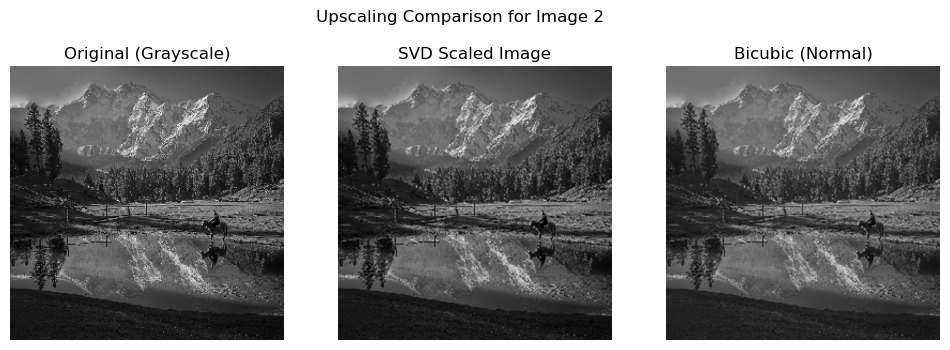

In [13]:
# Show example visual comparison 
example_idx = 1  # Change index to show other images

I_gray = dataset_gray[example_idx]
U, S, Vt = np.linalg.svd(I_gray, full_matrices=False)
U_scaled = cv2.resize(U, (U.shape[1], int(U.shape[0]*scale)), interpolation=cv2.INTER_CUBIC)
Vt_scaled = cv2.resize(Vt, (int(Vt.shape[1]*scale), Vt.shape[0]), interpolation=cv2.INTER_CUBIC)
I_svd_scaled = np.dot(U_scaled, np.dot(np.diag(S), Vt_scaled))
I_svd_scaled = np.clip(I_svd_scaled, 0, 1)
I_bicubic = cv2.resize(I_gray, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(I_gray, cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(I_svd_scaled, cmap='gray')
plt.title('SVD Scaled Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(I_bicubic, cmap='gray')
plt.title('Bicubic (Normal)')
plt.axis('off')
plt.suptitle(f"Upscaling Comparison for Image {example_idx+1}")
plt.show()

## **Plotting the PSNR and SSIM graphs**

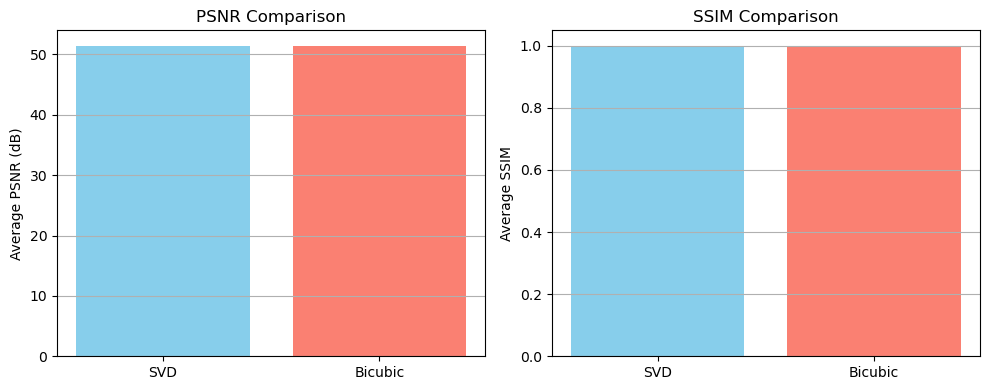

In [10]:
# Plot PSNR & SSIM comparison 
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(['SVD', 'Bicubic'], [np.mean(psnr_svd_all), np.mean(psnr_bicubic_all)], color=['skyblue', 'salmon'])
plt.ylabel('Average PSNR (dB)')
plt.title('PSNR Comparison')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.bar(['SVD', 'Bicubic'], [np.mean(ssim_svd_all), np.mean(ssim_bicubic_all)], color=['skyblue', 'salmon'])
plt.ylabel('Average SSIM')
plt.title('SSIM Comparison')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

## **Inference on the graphs**

**PSNR Graph** 

• The PSNR values for both SVD and Bicubic lie between 47–55 dB.

• The average PSNR difference between SVD and Bicubic is only 0.05 dB, which is negligible. This indicates extremely low reconstruction error and very high pixel accuracy.

• This shows that SVD reconstruction retains pixel-level accuracy almost equal to Bicubic interpolation.

• Overall, both methods achieve excellent pixel-level similarity with the original image.

**SSIM Graph**

• SSIM values for both SVD and Bicubic are very close to 1.0.

• This shows that structural details, textures, edges, and patterns are preserved almost perfectly.

• No significant difference exists between SVD and Bicubic in terms of structural similarity.

• Both methods maintain high visual quality when compared to the original image.

• Overall, SVD performs just as well as Bicubic in retaining the image’s structural information.

## **Applications of SVD rescaling**

**Medical Image Enhancement**

MRI, CT, X-ray images often require noise reduction + upscaling.
SVD preserves important structures during enlargement.

**Image Compression**

SVD is a classic compression technique.
Keeps important singular values, removes redundant information, smaller file size.

**Super-Resolution Imaging**

SVD helps reconstruct high-resolution images from low-resolution inputs.
Mainly used in security footage enhancement and face recognition systems.

**Image Reconstruction After Decimation**

The paper repeatedly tests SVD for restoring images that were downsampled.
Application: recovering lost resolution in old or degraded images.

## **Conclusion**

SVD upscales the images by manipulating their mathematical structure (U, Σ, Vᵀ). The results gives that SVD rescaling gives almost the same quality as bicubic interpolation. PSNR and SSIM values for both methods are very close, meaning both preserve image quality well. SVD is more mathematically interpretable it retains important features at higher scaling factors. SVD is a reliable and effective method for image upscaling compared with the performance of traditional interpolation methods.